#### MIS 776 Group 4
- Group Project
- Dataset: (LINK?)

***The objective of this project is to predict the length of hospital stay of a given patient based on the predictor variables.***

#### Todo: 
- **Come up with hypothesis to test (problem Statements)** 
- Check data types of each columns
- Define categorical vs. Numerical variables. 
- Data cleaning: 
    - Find missing values 
    - Impute missing values 
    - Convert categorical variables into Dummy Variables. 
    - **Clean up the predictor varible(stay) and transform it based on the group's choice**
    
- EDA: 
    - Plot numerical values
    - plot categorical values 
    - Check correlation (correlation chart, plot)
    - Check for multicollinearity 
    - Extract information from the data. 
    - **Form questions based on the information and answer the questions.** 
   
- Identify the best features(Predictor variables) based on EDA
- Define X(predictor variables)
- Define y(target)
- Split the data using train_test_split
- Normalize the data
- Model development 
    - Train Machine learning models
    - Test the models
    - Evaluate the models
    - retrain and test if necessary
    - Find the best model 
- Explain the best model and the reason for choosing the model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline 

In [2]:
dataDir = 'data sets/healthcare'
fileName = 'train_data.csv'
data = os.path.join(dataDir, fileName)

# Read the file
health = pd.read_csv(data)
health.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


#### Check the data types: 

In [3]:
health.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

**We have a mixture of categorial(object) and numercal variables**

### Data Cleaning 

#### Change the column names: 
- Shorten longer column names
- convert column names to lower case 

In [4]:
health.columns = ['case_id', 'hosp_code','hosp_type','city_code','hosp_region','rooms_available','department',
                  'ward_type','ward_code','bed_grade','patient_id','city_patientCode','admission_type',
                  'severity','num_visitors','age','deposit','stay']

In [5]:
health.head()

,case_id,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,city_patientCode,admission_type,severity,num_visitors,age,deposit,stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


### Missing Values

In [6]:
health.shape

(318438, 18)

In [7]:
# Find columns with missing values 
health.isna().sum()

case_id                0
hosp_code              0
hosp_type              0
city_code              0
hosp_region            0
rooms_available        0
department             0
ward_type              0
ward_code              0
bed_grade            113
patient_id             0
city_patientCode    4532
admission_type         0
severity               0
num_visitors           0
age                    0
deposit                0
stay                   0
dtype: int64

- There are two colummns with missing values : 
    - city_patientCode
    - Bed_grade 
- There are over 31,800 individual records and only 4532 records with missing values from city_patientCode and 113 missing values from bed_grade. 
- We can easily drop those rows and still keep majority of the information intact. 

In [8]:
# Check rows with missing values 
health[health.city_patientCode.isna()]

,case_id,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,city_patientCode,admission_type,severity,num_visitors,age,deposit,stay
191,192,14,a,1,X,2,radiotherapy,Q,E,3.0,122110,NaN,Emergency,Minor,2,71-80,9096,51-60
192,193,30,c,3,Z,2,anesthesia,Q,A,4.0,122110,NaN,Trauma,Minor,2,71-80,5098,31-40
193,194,27,a,7,Y,2,radiotherapy,P,C,3.0,122110,NaN,Trauma,Minor,2,71-80,7776,21-30
194,195,27,a,7,Y,2,anesthesia,Q,C,3.0,122110,NaN,Trauma,Minor,2,71-80,5988,20-Nov
195,196,25,e,1,X,3,radiotherapy,S,E,3.0,122110,NaN,Urgent,Minor,2,71-80,5333,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318198,318199,23,a,6,X,2,anesthesia,Q,F,3.0,58469,NaN,Urgent,Minor,2,20-Nov,4432,20-Nov
318263,318264,28,b,11,X,3,anesthesia,R,F,3.0,66803,NaN,Trauma,Moderate,2,31-40,5415,20-Nov
318269,318270,26,b,2,Y,3,gynecology,R,D,4.0,95483,NaN,Trauma,Minor,5,51-60,4135,51-60
318271,318272,28,b,11,X,2,gynecology,R,F,4.0,117128,NaN,Emergency,Minor,2,61-70,3418,0-10


In [9]:
health[health.bed_grade.isna()]

,case_id,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,city_patientCode,admission_type,severity,num_visitors,age,deposit,stay
293,294,6,a,6,X,4,gynecology,Q,F,NaN,27075,15.0,Trauma,Extreme,2,21-30,4420,31-40
1071,1072,6,a,6,X,2,gynecology,Q,F,NaN,62491,8.0,Trauma,Extreme,4,61-70,5395,21-30
20379,20380,6,a,6,X,4,gynecology,Q,F,NaN,69932,2.0,Trauma,Extreme,3,41-50,5989,31-40
23791,23792,6,a,6,X,3,gynecology,R,F,NaN,29943,10.0,Emergency,Minor,3,31-40,4488,41-50
25162,25163,6,a,6,X,5,gynecology,R,F,NaN,92499,1.0,Emergency,Minor,2,71-80,4885,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234337,234338,6,a,6,X,2,radiotherapy,R,F,NaN,22881,7.0,Emergency,Minor,2,20-Nov,2416,0-10
234577,234578,6,a,6,X,2,gynecology,R,F,NaN,120677,2.0,Trauma,Extreme,4,41-50,4932,51-60
234895,234896,6,a,6,X,2,gynecology,R,F,NaN,111514,1.0,Trauma,Moderate,4,51-60,3984,20-Nov
235048,235049,6,a,6,X,2,gynecology,R,F,NaN,57706,2.0,Trauma,Moderate,3,41-50,4139,51-60


In [10]:
### Check for missing values in both city_patientCode and bed_grade
((health.city_patientCode.isna()) & (health.bed_grade.isna())).sum()

0

- There seem to be **no data points with missing values that are common to both city_patientCode and bed_grade.**
- There aren't many missing values in the dataset, we can select best course of action with missing vallues after further evaluation of the dataset. 

In [11]:
health.bed_grade.unique()

array([ 2.,  3.,  4.,  1., nan])

#### Drop rows with missing values in bed_grade

In [12]:
health.shape

(318438, 18)

In [13]:
# Drop null values 
health.dropna(subset=['bed_grade'],how='any',inplace=True)

In [14]:
# Check for any null values present 
health.bed_grade.isna().sum()

0

### city_patientCode column

In [15]:
health.city_patientCode.unique()

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., nan, 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27.,
       22., 19., 31., 34., 32., 30., 29., 37., 33., 35., 36., 38.])

In [16]:
# Check the number of missing values
health.city_patientCode.isna().sum()

4532

In [17]:
# Check agragates of city patient code variable with stay
health.groupby('stay').city_patientCode.mean()

stay
0-10                  7.636602
20-Nov                7.299682
21-30                 7.133672
31-40                 7.271248
41-50                 7.574907
51-60                 7.003743
61-70                 7.589325
71-80                 7.328348
81-90                 7.091367
91-100                7.318835
More than 100 Days    7.316432
Name: city_patientCode, dtype: float64

- city_patientCode aggrate values within stay categories seems almost identical. 
- **Given the number of missing values and lack of variation we have decided to drop this column.**

In [18]:
health.drop('city_patientCode', axis=1, inplace=True)

In [19]:
health.isna().sum()

case_id            0
hosp_code          0
hosp_type          0
city_code          0
hosp_region        0
rooms_available    0
department         0
ward_type          0
ward_code          0
bed_grade          0
patient_id         0
admission_type     0
severity           0
num_visitors       0
age                0
deposit            0
stay               0
dtype: int64

#### Now we have sucessfully dealt with all the missing values. 

### Case_id column 

In [20]:
health.case_id.unique()

array([     1,      2,      3, ..., 318436, 318437, 318438])

- Just by looking at the unique values in teh case_id column we can conclude that case_id is just an index number depicting all the rows. 

- We can drop this column as well. 

In [21]:
health.drop('case_id', axis=1, inplace=True)

In [22]:
health.head()

,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,admission_type,severity,num_visitors,age,deposit,stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,Emergency,Extreme,2,51-60,4911,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,Trauma,Extreme,2,51-60,5954,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,Trauma,Extreme,2,51-60,4745,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,Trauma,Extreme,2,51-60,7272,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,Trauma,Extreme,2,51-60,5558,41-50


### Stay Column (Target Variable)
- The stay column displays the number of days a patient is in the hospital. 
- The stay is a date range instead of a single number 

In [23]:
health.stay.unique()

array(['0-10', '41-50', '31-40', '20-Nov', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

- There are 11 unique combinations of date ranges in the stay variable. 
- The ranges are in increments of 10 days upto 100 days and one range depicting patients who stayed longer than 100 days. 

#### Dummy values for stay categories 
- We can devided the categories into 11 values from 0 through 10, where 11 depicting More than 100 Days category. 
- First we need to change the **20-Nov** value which is a typo for category 11-20 days. 

In [24]:
health['stay'] = health['stay'].replace(['0-10','20-Nov','21-30','31-40','41-50','51-60'],[0,1,2,3,4,5])

In [25]:
health['stay'] = health['stay'].replace(['61-70','71-80','81-90','91-100'],[6,7,8,9])
health['stay'] = health['stay'].replace(['More than 100 Days'],10)

In [26]:
health.stay.unique()

array([ 0,  4,  3,  1,  5,  2,  7, 10,  8,  6,  9])

In [27]:
health.head()

,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,admission_type,severity,num_visitors,age,deposit,stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,Emergency,Extreme,2,51-60,4911,0
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,Trauma,Extreme,2,51-60,5954,4
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,Trauma,Extreme,2,51-60,4745,3
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,Trauma,Extreme,2,51-60,7272,4
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,Trauma,Extreme,2,51-60,5558,4


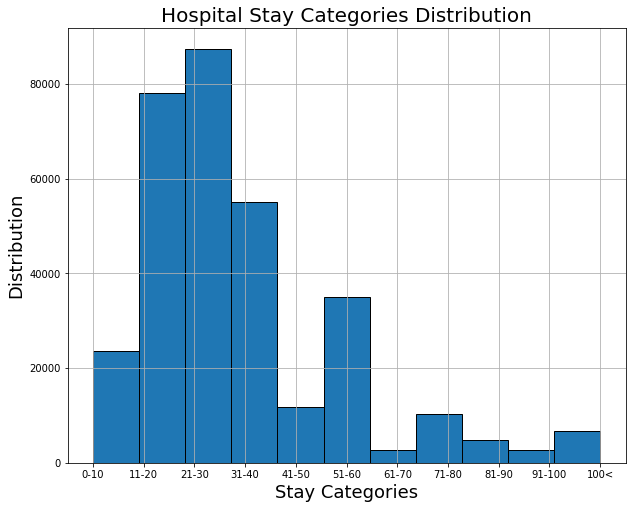

In [28]:
# Plot the stay variable

plt.figure(figsize=(10,8))

plt.hist(health.stay, ec='k',bins=11)

plt.xlabel('Stay Categories', fontsize=18)
plt.ylabel('Distribution', fontsize=18)
plt.grid();plt.xticks(np.arange(11),('0-10','11-20','21-30', "31-40", '41-50', "51-60",
                          '61-70','71-80','81-90','91-100', '100<'))
plt.title('Hospital Stay Categories Distribution', fontsize=20);

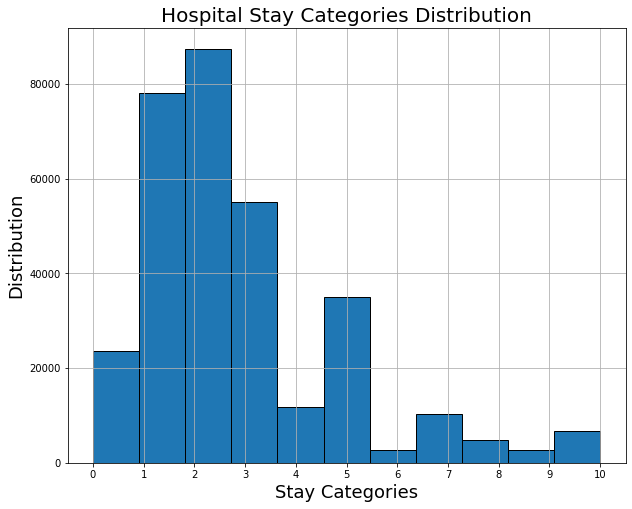

In [29]:
# Plot the stay variable

plt.figure(figsize=(10,8))

plt.hist(health.stay, ec='k',bins=11)

plt.xlabel('Stay Categories', fontsize=18)
plt.ylabel('Distribution', fontsize=18)
plt.xticks(np.arange(0,11,1))
plt.title('Hospital Stay Categories Distribution', fontsize=20)
plt.grid();

- From the plot we can now see that **most of the values are between 1 and 3**, **which indicates 11-20, 21-30, and 31-40 days.**
- More patients seem to have a hospital stay between 11 to 50 days.  

### Bed Grade column

In [30]:
# Value counts in each category
health.bed_grade.value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: bed_grade, dtype: int64

In [31]:
# Unique values 
health.bed_grade.unique()

array([2., 3., 4., 1.])

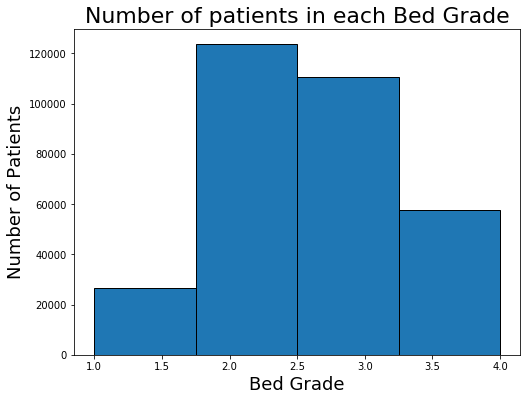

In [32]:
# Plot the three admission types

plt.figure(figsize=(8,6))

plt.hist(health.bed_grade.sort_values(), ec='k', bins=4)

plt.xlabel('Bed Grade',fontsize=18)
plt.ylabel('Number of Patients',fontsize=18)
plt.title('Number of patients in each Bed Grade',fontsize=22);

***Distribution of Length of stay based on bed grade***

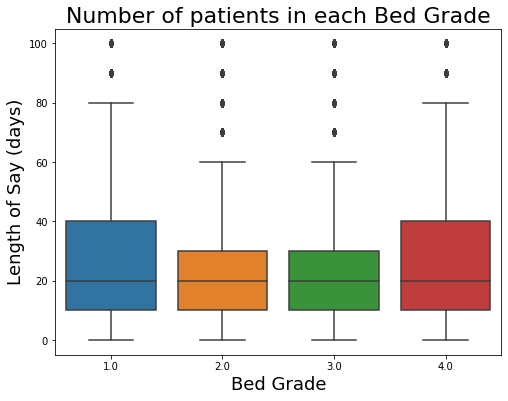

In [33]:
# Plot the three admission types

plt.figure(figsize=(8,6))

sns.boxplot('bed_grade',health['stay'] * 10, data=health)

plt.xlabel('Bed Grade',fontsize=18)
plt.ylabel('Length of Say (days)',fontsize=18)
plt.title('Number of patients in each Bed Grade',fontsize=22);

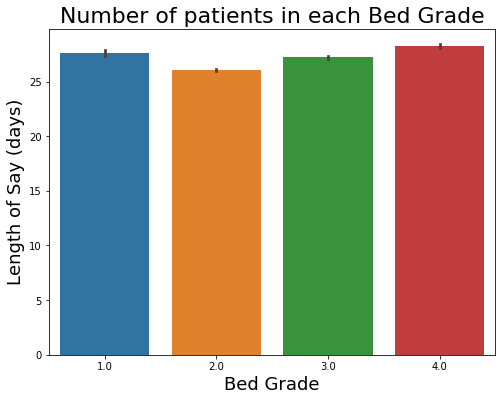

In [34]:
# Plot the three admission types

plt.figure(figsize=(8,6))

sns.barplot('bed_grade',health['stay'] * 10, data=health)

plt.xlabel('Bed Grade',fontsize=18)
plt.ylabel('Length of Say (days)',fontsize=18)
plt.title('Number of patients in each Bed Grade',fontsize=22);

- The average length of stay in each category seems to be extremely similar. However, they do differ slightly. 
- ***Bed Grade is most likely a good indicator of length of stay***

### Age variable

In [35]:
health.age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '20-Nov', '0-10', '91-100'], dtype=object)

- There seems to be 10 categories of age, each on a 10 year interval. 
- 20-Nov like previousely should belong to the 11-20 category. 

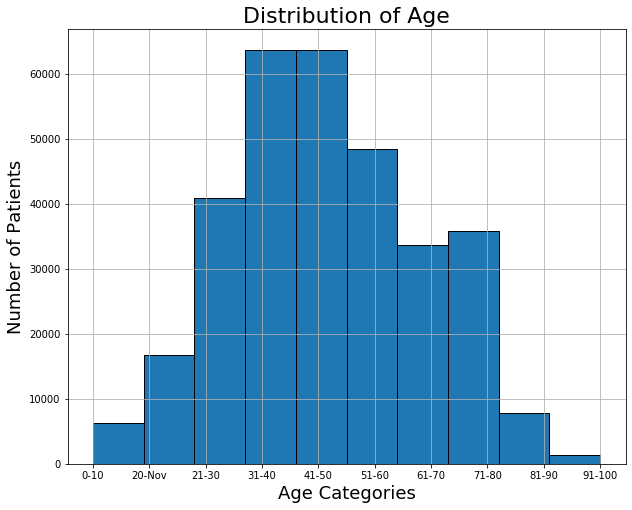

In [36]:
## Plot the distribution of the age variable 

plt.figure(figsize=(10,8))

plt.hist(health.age.sort_values(), ec='k',bins=10)

plt.xlabel('Age Categories',fontsize=18)
plt.ylabel('Number of Patients',fontsize=18)
plt.title('Distribution of Age',fontsize=22)
plt.grid();

- The data seems to be pretty normally distributed
- Ages 31-40 and 41-50 seems to have similar amount of patients

### Transforming the age variable. 

- We can devide the age variable into 10 categores, one for each decade. 

In [37]:
health['age'] = health['age'].replace(['0-10','20-Nov','21-30','31-40','41-50','51-60'],[0,1,2,3,4,5])
health['age'] = health['age'].replace(['61-70','71-80','81-90','91-100'],[6,7,8,9])

In [38]:
health.age.unique()

array([5, 7, 3, 4, 8, 6, 2, 1, 0, 9])

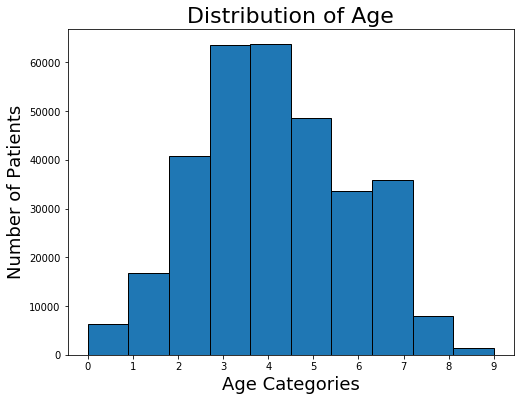

In [39]:
### Plot new age distributions 

plt.figure(figsize=(8,6))

plt.hist(health.age.sort_values(), ec='k', bins=10)

plt.xlabel('Age Categories',fontsize=18)
plt.ylabel('Number of Patients',fontsize=18)
plt.xticks(np.arange(0,10,1))
plt.title('Distribution of Age',fontsize=22);

In [40]:
health.head()

,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,admission_type,severity,num_visitors,age,deposit,stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,Emergency,Extreme,2,5,4911,0
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,Trauma,Extreme,2,5,5954,4
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,Trauma,Extreme,2,5,4745,3
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,Trauma,Extreme,2,5,7272,4
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,Trauma,Extreme,2,5,5558,4


***Which age group has the highest average hospital stay***

In [41]:
avgDaysStay1 = ((health.groupby('age').stay.mean().sort_values())) * 10

In [42]:
avgDayStay = pd.DataFrame()

avgDayStay['Age_range'] = ['11-20','0-10','21-30', "31-40", '41-50', "51-60",'61-70','71-80','81-90','91-100']
avgDayStay['Average_stay'] = round(avgDaysStay1)

In [43]:
### Display the average days stayed for each age group. 
avgDayStay

,Age_range,Average_stay
0,11-20,24.0
1,0-10,23.0
2,21-30,24.0
3,31-40,26.0
4,41-50,27.0
5,51-60,28.0
6,61-70,29.0
7,71-80,29.0
8,81-90,33.0
9,91-100,33.0


- Age groups 8 and 9 has the highest average hospital stays. 
- Age groups 8 and 9 depicts patients in age groups 81-90 and 91-100. 
- **It is interesting to see how the length of stay increases as the age of the patient increase as well.** 
- **The only exception to this scenario is age group 0, which depicts patients in ages 0-10** 
- Both these observations do make sence.  

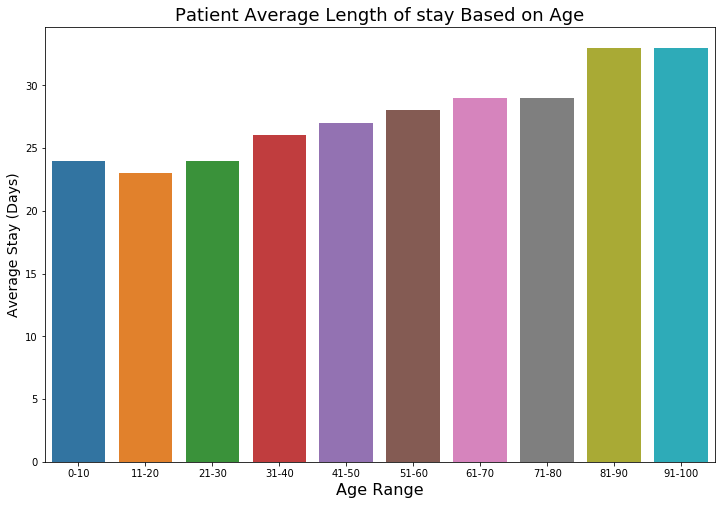

In [44]:
plt.figure(figsize=(12,8))

sns.barplot('Age_range','Average_stay',data=avgDayStay)

plt.xlabel('Age Range',fontsize=16)
plt.ylabel('Average Stay (Days)',fontsize=14)
plt.title('Patient Average Length of stay Based on Age',fontsize=18)
plt.xticks(np.arange(10),('0-10','11-20','21-30', "31-40", '41-50', "51-60",
                          '61-70','71-80','81-90','91-100'))
    
plt.show();

### Department Variable

In [45]:
health.department.unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

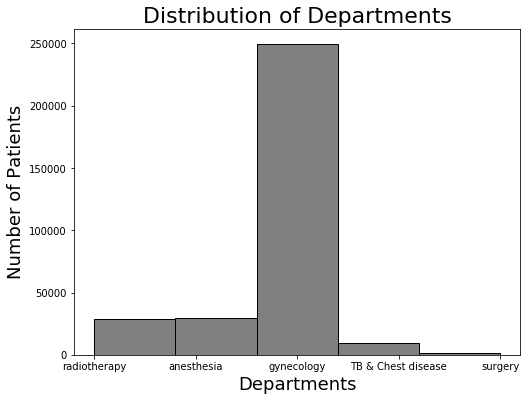

In [46]:
## Visualize the different departments
plt.figure(figsize=(8,6))

plt.hist(health.department, ec='k', bins=5, color='grey')

plt.xlabel('Departments',fontsize=18)
plt.ylabel('Number of Patients',fontsize=18)
plt.title('Distribution of Departments',fontsize=22);

- Gynecology department seems to have exponentially large amount of patients compared to other departments. 
- There could be a large amounts of patients in for child birth. 

In [47]:
# Convert Deparments into five numerical categories.

health['department'] = health['department'].astype('category')
health['department'] = pd.factorize(health['department'])[0]

In [48]:
health.department.unique()

array([0, 1, 2, 3, 4])

In [49]:
health.department.value_counts(sort=False)

0     28506
1     29647
2    249387
3      9584
4      1201
Name: department, dtype: int64

***What is the Average length of stay for patients in each departemnt?***

In [50]:
# Get Average length of stay of patients in each department
avgStayDept = (health.groupby('department').stay.mean()) * 10

In [51]:
# Add calculated average values to a dataframe
avgDeptDF = pd.DataFrame()

avgDeptDF['Department'] = ['Radiology','Anesthesia','Gynecology', "TB and Chest", 'Surgery']
avgDeptDF['Average_stay'] = round(avgStayDept)

In [52]:
avgDeptDF

,Department,Average_stay
0,Radiology,28.0
1,Anesthesia,25.0
2,Gynecology,27.0
3,TB and Chest,26.0
4,Surgery,32.0


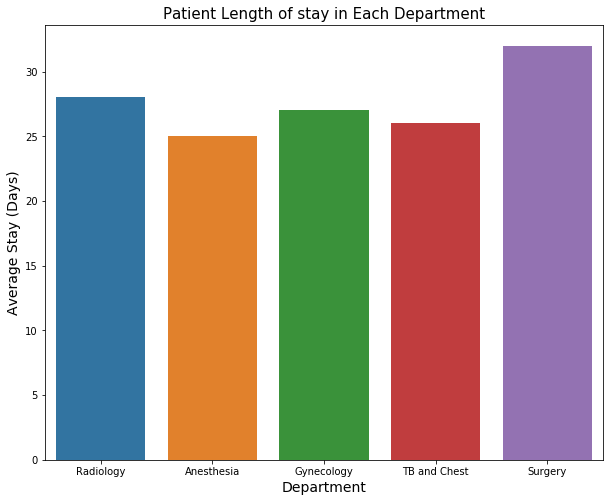

In [53]:
plt.figure(figsize=(10,8))

sns.barplot('Department','Average_stay',data=avgDeptDF)

plt.xlabel('Department',fontsize=14)
plt.ylabel('Average Stay (Days)',fontsize=14)
plt.title('Patient Length of stay in Each Department',fontsize=15)
plt.xticks(np.arange(5),('Radiology','Anesthesia','Gynecology', "TB and Chest",'Surgery'));

- Patients who are in the surgery department are staying longer on average. 
- Patients in other departments have very similar average stays. 

***What is the distribution of average age of patients in each department?***

In [54]:
# Calculate the average age of patientes in each department
avgAgeDept = (health.groupby('department').age.mean().round()) * 10

In [55]:
# Add the values to the dataframe
avgDeptDF['Average_age'] = avgAgeDept

avgDeptDF

,Department,Average_stay,Average_age
0,Radiology,28.0,50.0
1,Anesthesia,25.0,40.0
2,Gynecology,27.0,40.0
3,TB and Chest,26.0,40.0
4,Surgery,32.0,50.0


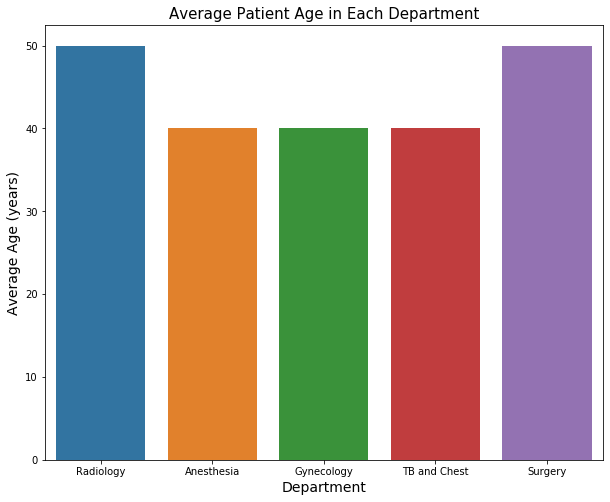

In [56]:
plt.figure(figsize=(10,8))

sns.barplot('Department','Average_age',data=avgDeptDF)

plt.xlabel('Department',fontsize=14)
plt.ylabel('Average Age (years)',fontsize=14)
plt.title('Average Patient Age in Each Department',fontsize=15)
plt.xticks(np.arange(5),('Radiology','Anesthesia','Gynecology', "TB and Chest",'Surgery'));

- Patients in both Radiology and Surgery departments are older on average than other departments (50 years)
- Patients in all other departments average 40 years. 

### Admission Type

In [57]:
health.admission_type.unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

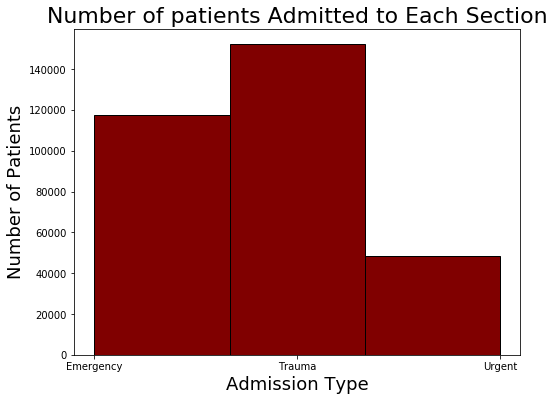

In [58]:
# Plot the three admission types

plt.figure(figsize=(8,6))

plt.hist(health.admission_type.sort_values(), ec='k', bins=3, color='maroon')

plt.xlabel('Admission Type',fontsize=18)
plt.ylabel('Number of Patients',fontsize=18)
plt.title('Number of patients Admitted to Each Section',fontsize=22)
plt.xticks(np.arange(3),('Emergency','Trauma','Urgent'));

In [59]:
health.admission_type.value_counts()

Trauma       152200
Emergency    117624
Urgent        48501
Name: admission_type, dtype: int64

In [60]:
# Convert Admission types into three numerical categories.

health['admission_type'] = health['admission_type'].astype('category')
health['admission_type'] = pd.factorize(health['admission_type'])[0]

***How many patiensts are admitted in each admission type?***

In [61]:
health.admission_type.unique()

array([0, 1, 2])

In [62]:
health.admission_type.value_counts()

1    152200
0    117624
2     48501
Name: admission_type, dtype: int64

***What is the average length of stay in each admission type?***

In [63]:
# Calculate the average age of patientes in each department
avgAdminType = (health.groupby('admission_type').stay.mean().round()) * 10

In [64]:
# Enter vaues to a new DF 
adminTypeDF = pd.DataFrame()

adminTypeDF['Admission_type'] = ['Emergency','Trauma','Urgent']
adminTypeDF['Average_stay'] = avgAdminType

adminTypeDF

,Admission_type,Average_stay
0,Emergency,30.0
1,Trauma,30.0
2,Urgent,20.0


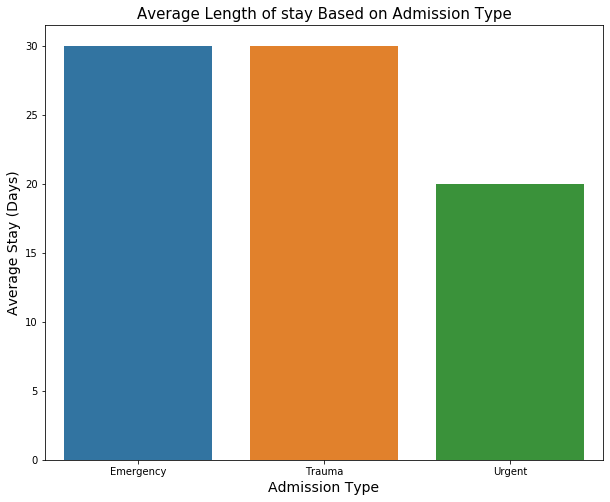

In [65]:
plt.figure(figsize=(10,8))

sns.barplot('Admission_type','Average_stay',data=adminTypeDF)

plt.xlabel('Admission Type',fontsize=14)
plt.ylabel('Average Stay (Days)',fontsize=14)
plt.title('Average Length of stay Based on Admission Type',fontsize=15)
plt.xticks(np.arange(3),('Emergency','Trauma','Urgent'));

- Urgent care patients on average seem to have stayed 20 days while Emergency and Trauma patients stayed 30 days on average. 

### Severity

In [66]:
health.severity.unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

- Severity variable also has three categories. 

In [67]:
health.severity.value_counts()

Moderate    175793
Minor        85850
Extreme      56682
Name: severity, dtype: int64

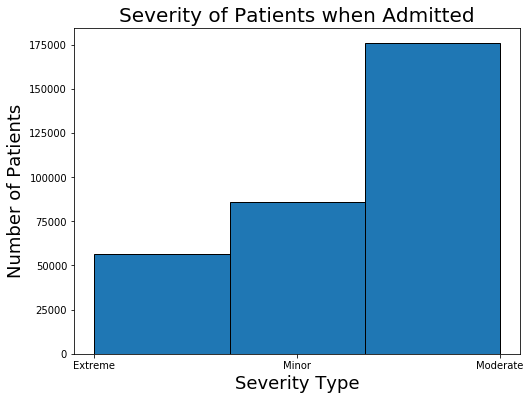

In [68]:
# Plot the three Severity types

plt.figure(figsize=(8,6))

plt.hist(health.severity.sort_values(), ec='k', bins=3)

plt.xlabel('Severity Type',fontsize=18)
plt.ylabel('Number of Patients',fontsize=18)
plt.title('Severity of Patients when Admitted',fontsize=20);

- Less patients admitted in extreme severe condition, which makes sence.
- More patients are admitted with moderate conditions. 

In [69]:
# Convert Severity types into three numerical categories.

health['severity'] = health['severity'].astype('category')
health['severity'] = pd.factorize(health['severity'])[0]

In [70]:
health.severity.unique()

array([0, 1, 2])

In [71]:
health.severity.value_counts()

1    175793
2     85850
0     56682
Name: severity, dtype: int64

***What is the average length of stay beased on severity?***

In [72]:
health.groupby('severity').stay.mean() * 10

severity
0    31.311704
1    27.447509
2    23.178451
Name: stay, dtype: float64

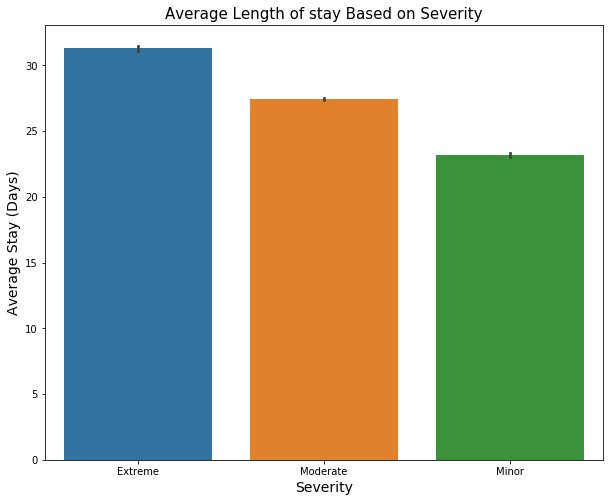

In [73]:
plt.figure(figsize=(10,8))

sns.barplot('severity',health['stay'] *10,data=health)

plt.xlabel('Severity',fontsize=14)
plt.ylabel('Average Stay (Days)',fontsize=14)
plt.title('Average Length of stay Based on Severity',fontsize=15)
plt.xticks(np.arange(3),('Extreme','Moderate','Minor'));

- This results are pretty obviouse. 
- **The length of stay highly vary based on the severity of the patient. Severity seems like one of the best variables to predict stay.**

### Other Categorical Variable Transformation

In [74]:
health.head()

,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,admission_type,severity,num_visitors,age,deposit,stay
0,8,c,3,Z,3,0,R,F,2.0,31397,0,0,2,5,4911,0
1,2,c,5,Z,2,0,S,F,2.0,31397,1,0,2,5,5954,4
2,10,e,1,X,2,1,S,E,2.0,31397,1,0,2,5,4745,3
3,26,b,2,Y,2,0,R,D,2.0,31397,1,0,2,5,7272,4
4,26,b,2,Y,2,0,S,D,2.0,31397,1,0,2,5,5558,4


In [75]:
health.dtypes

hosp_code            int64
hosp_type           object
city_code            int64
hosp_region         object
rooms_available      int64
department           int64
ward_type           object
ward_code           object
bed_grade          float64
patient_id           int64
admission_type       int64
severity             int64
num_visitors         int64
age                  int64
deposit              int64
stay                 int64
dtype: object

### City Code variable

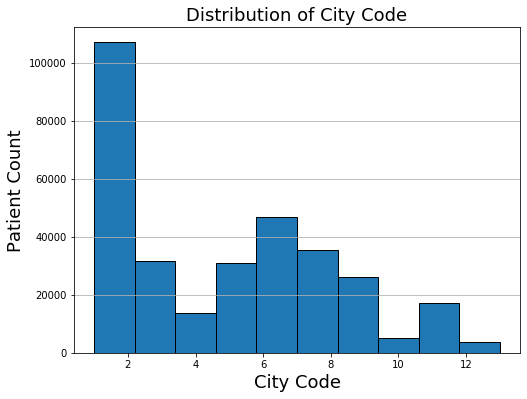

In [76]:
# City code variable
plt.figure(figsize=(8,6))
plt.hist(health['city_code'], ec='k')
plt.title('Distribution of City Code',fontsize=18)
plt.xlabel('City Code',fontsize=18)
plt.ylabel('Patient Count',fontsize=18)
plt.grid(axis='y')
    
plt.show()

- Code 1 seems to have the highest amount of patients. 

#### Plot the average stay in each city code 

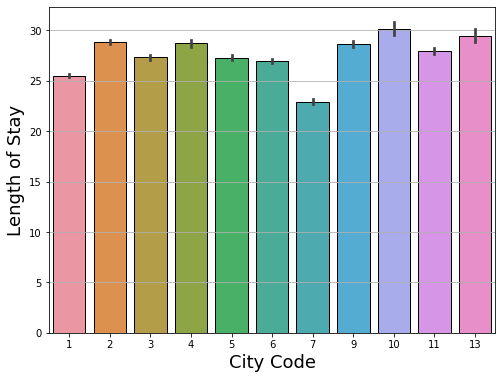

In [77]:
plt.figure(figsize=(8,6))
sns.barplot(health['city_code'].sort_values(),(health['stay']*10), ec='k')
plt.xlabel('City Code',fontsize=18)
plt.ylabel('Length of Stay',fontsize=18)
plt.grid(axis='y')
    
plt.show()

- Average length of stay significantly vary based on the city code. This could be a good sign of predictability of stay. 

In [78]:
# Get all other categorical variables
categorical_variables = ['hosp_type','hosp_region','ward_type','ward_code']

In [79]:
# Check unique values in every category 
for i in categorical_variables:
    print(i,'categories:',health[i].unique())

hosp_type categories: ['c' 'e' 'b' 'a' 'f' 'd' 'g']
hosp_region categories: ['Z' 'X' 'Y']
ward_type categories: ['R' 'S' 'Q' 'P' 'T' 'U']
ward_code categories: ['F' 'E' 'D' 'B' 'A' 'C']


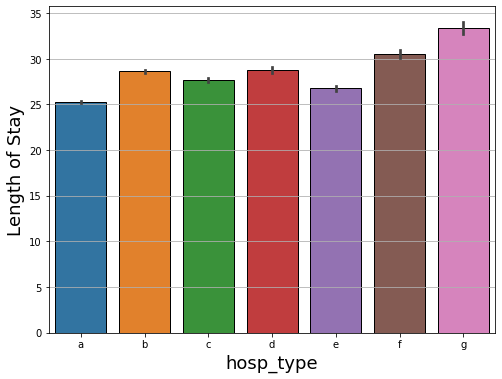

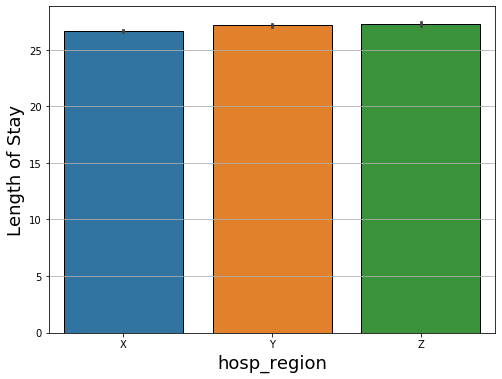

In [80]:
for i in categorical_variables[0:2]: 
    plt.figure(figsize=(8,6))
    sns.barplot(health[i].sort_values(),(health['stay']*10), ec='k')
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Length of Stay',fontsize=18);
    #plt.title('Severity of Patients when Admitted',fontsize=20)
    plt.grid(axis='y')
    
    plt.show()

- Hospital type looks like another differentiating varaible, given different hospital types have varying stay lengths. 
- Length of stay based on hospital region seems to be pretty similar. This is probabely not a differentiating factor.  

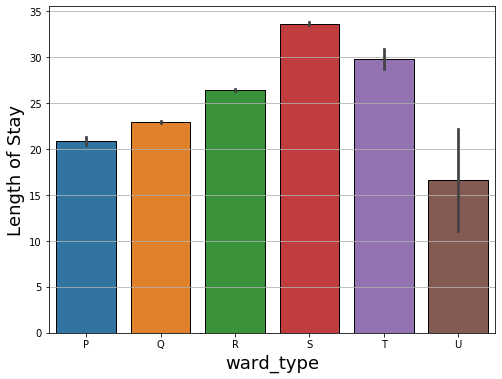

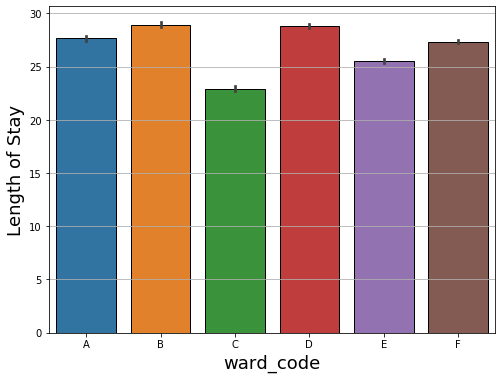

In [81]:
for i in categorical_variables[2:]: 
    plt.figure(figsize=(8,6))
    sns.barplot(health[i].sort_values(),(health['stay']*10), ec='k')
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Length of Stay',fontsize=18)
    plt.grid(axis='y')
    
plt.show()

- Ward type also have different average length of stay. It could be a good predictor. 
- The  variation in length of stay in Ward code is not high.
- We can see a pretty good variation when comparing the mean stay in each city code category. 

In [82]:
## Convert other categorical variabels into numerical cateories  

for i in categorical_variables:
    health[i] = health[i].astype('category')
    health[i] = pd.factorize(health[i])[0]

In [83]:
health.head()

,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,admission_type,severity,num_visitors,age,deposit,stay
0,8,0,3,0,3,0,0,0,2.0,31397,0,0,2,5,4911,0
1,2,0,5,0,2,0,1,0,2.0,31397,1,0,2,5,5954,4
2,10,1,1,1,2,1,1,1,2.0,31397,1,0,2,5,4745,3
3,26,2,2,2,2,0,0,2,2.0,31397,1,0,2,5,7272,4
4,26,2,2,2,2,0,1,2,2.0,31397,1,0,2,5,5558,4


In [84]:
## Check the new categories 
for i in categorical_variables:
    print(i,'categories:',health[i].unique())

hosp_type categories: [0 1 2 3 4 5 6]
hosp_region categories: [0 1 2]
ward_type categories: [0 1 2 3 4 5]
ward_code categories: [0 1 2 3 4 5]


In [85]:
#### Save the edited (cleaned) dataset
health.to_csv('healthcareClanedTrain3.csv')

### Patient_id variable

In [86]:
health.patient_id.value_counts()

66714     50
91292     43
38525     39
101359    36
33491     34
          ..
97969      1
98821      1
104966     1
129546     1
58524      1
Name: patient_id, Length: 92009, dtype: int64

In [87]:
# How many unique values are there in patient_id variable? 
health.patient_id.nunique()

92009

- **It is probabely acceptable to drop the Patient id variable.**
- The variable seems to be just a place holder identifying different patients.

In [88]:
## Drop patient id column 
#health.drop('patient_id', axis=1, inplace=True)

In [89]:
health.head()

,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,admission_type,severity,num_visitors,age,deposit,stay
0,8,0,3,0,3,0,0,0,2.0,31397,0,0,2,5,4911,0
1,2,0,5,0,2,0,1,0,2.0,31397,1,0,2,5,5954,4
2,10,1,1,1,2,1,1,1,2.0,31397,1,0,2,5,4745,3
3,26,2,2,2,2,0,0,2,2.0,31397,1,0,2,5,7272,4
4,26,2,2,2,2,0,1,2,2.0,31397,1,0,2,5,5558,4


In [90]:
#### Save the newest dataset
#health.to_csv('healthcareClanedTrain2.csv')

### hosp_code variable

In [91]:
# Check unique values for hospital code variable. 

health.hosp_code.unique()

array([ 8,  2, 10, 26, 23, 32,  1, 22, 16,  9,  6, 29, 12,  3, 21, 28, 27,
       19,  5, 14, 13, 31, 24, 17, 25, 15, 11, 30, 18,  4,  7, 20])

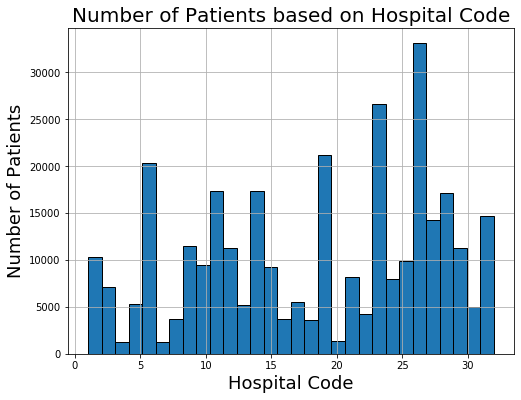

In [92]:
plt.figure(figsize=(8,6))
plt.hist(health['hosp_code'].sort_values(), ec='k', bins=30)
plt.xlabel('Hospital Code',fontsize=18)
plt.ylabel('Number of Patients',fontsize=18);
plt.title('Number of Patients based on Hospital Code',fontsize=20)
plt.grid();

- There are 32 different nominal categories in this variable. 
- The distribution of amount of patients in different hospitals is significantly varied. 

***Plot length of stay based on hospital code***

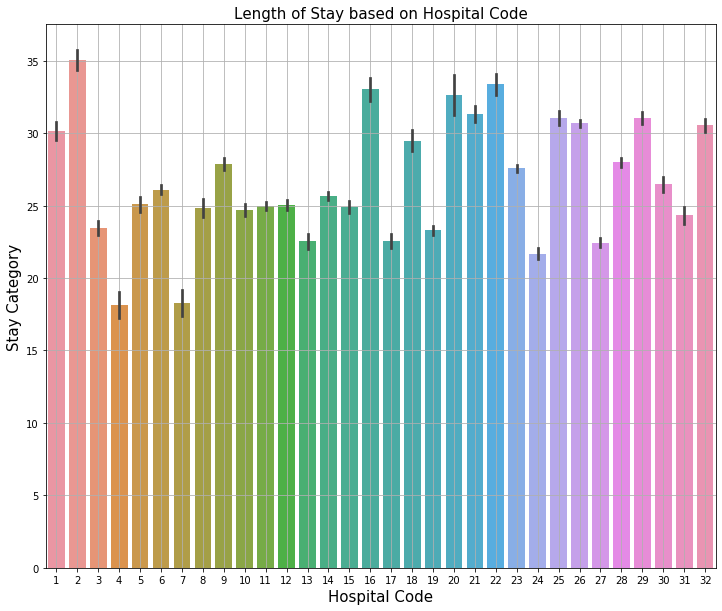

In [93]:
plt.figure(figsize=(12,10))

sns.barplot('hosp_code', (health['stay'] * 10), data=health)
plt.xlabel('Hospital Code',fontsize=15)
plt.ylabel('Stay Category', fontsize=15)
plt.title('Length of Stay based on Hospital Code', fontsize=15)
plt.grid();

- From the data it seems like most people stayed between 20 to 40 days at each hospital
- Hospital code could be a differentiating variable, given the variation in the distribution. 

### Categorical Variables Summary

- **Bed Grade and City patient code** are the only variables with missing values. 
- **City patient code** variable has over 4500 missing values and it doesn’t seem to be very significant other than just a placeholder. **We have decided to drop this variable.** 
- Bed Grade has about 113 missing values and we can easily **drop the rows with missing values** and retain the rest of the data. 
- In comparison the means of each bed grade category seems to be identical (boxplot). However, the distributions slightly vary. Further, when considering the average stay length of each bed grade category, we can see a slight variation within categories.
- As the **age** group increase the average hospital stay varies. This is an indication of variation hence using age variable in modeling could be beneficial. 
- **Department** variable also shows variation when considering average length of stay. 
- **Admission type** variable consists of three categories. Patients who were admitted to urgent care seems to have the lowest average  stays, while patients who were admitted to emergency and trauma have much higher average stays. 
- With **severity** variable, more severe patients seem to stay longer than less severe patients. There is significant separation between severity of a patient and the length of stay. This feature could be a pretty good predictor. 
- From all other categorical variables **hospital type, ward type, city code and ward code** seems to have different mean length of stay among categories, thus making good predictors of stay. **Hospital region** on the other hand does not seem to have much variance among categories when considering mean length of stay. 
- **Patient Id** variable can be dropped. It seems to be just a place holder. 
- **Hospital code** variable contains 32 unique nominal categories. Length of stay based on each category seems significantly different indicating variation within categories. Hence this could be a good predictor for stay. 
- **Hospital code, age, department, admission type, severity, hospital type, ward type, ward code, city code , bed grade, admission type, and severity** variables  seem to be the best variables for modeling. We can compare these variables even further by fitting a decision tree and checking for feature importance. 
- Variables such as patient id, case id, and city patient code are dropped due to various reasons.  


### Numeric Features

In [94]:
health.head()

,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,admission_type,severity,num_visitors,age,deposit,stay
0,8,0,3,0,3,0,0,0,2.0,31397,0,0,2,5,4911,0
1,2,0,5,0,2,0,1,0,2.0,31397,1,0,2,5,5954,4
2,10,1,1,1,2,1,1,1,2.0,31397,1,0,2,5,4745,3
3,26,2,2,2,2,0,0,2,2.0,31397,1,0,2,5,7272,4
4,26,2,2,2,2,0,1,2,2.0,31397,1,0,2,5,5558,4


In [95]:
numerical_features = ['rooms_available','num_visitors','deposit']

In [96]:
# Check descritive stats of Numerical features 
health[numerical_features].describe()

,rooms_available,num_visitors,deposit
count,318325.000000,318325.000000,318325.000000
mean,3.197509,3.284153,4880.857705
std,1.168208,1.764190,1086.848051
min,0.000000,0.000000,1800.000000
25%,2.000000,2.000000,4186.000000
50%,3.000000,3.000000,4741.000000
75%,4.000000,4.000000,5409.000000
max,24.000000,32.000000,11008.000000


- rooms_available and num_visitors seem to have outlires. 
    - rooms_available -> mean=3.1, max=24 
    - num_visitros -> mean=3.2, max=32
    - Max for num_visitiors is unusually high. This could be an error. 

### Multicollinearity
**Correlation between numerical features**

In [97]:
corr_num = health[['rooms_available','num_visitors','deposit']].corr()
corr_num

,rooms_available,num_visitors,deposit
rooms_available,1.000000,0.096755,-0.143722
num_visitors,0.096755,1.000000,-0.150363
deposit,-0.143722,-0.150363,1.000000


- None of the three numerical features seems to be highly correlated to each other.

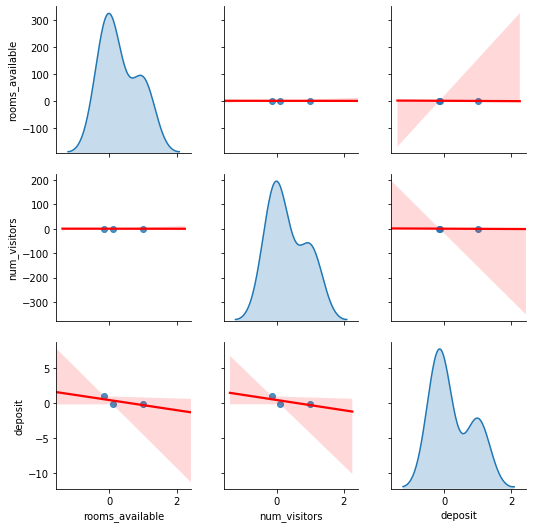

In [98]:
sns.pairplot(corr_num,kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.show()

- The plot confirms the lack of correlation among the numerical variables.

### rooms_available feature 

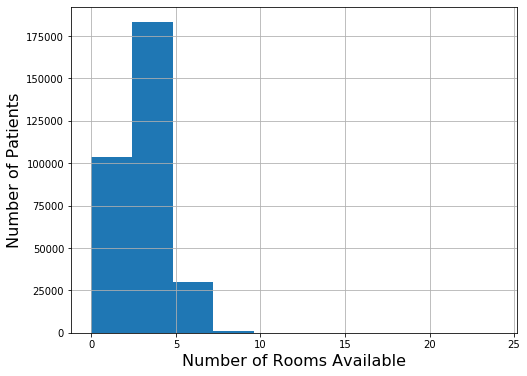

In [99]:
plt.figure(figsize=(8,6))
plt.hist(health['rooms_available'])
plt.xlabel('Number of Rooms Available', fontsize=16)
plt.ylabel('Number of Patients', fontsize=16)
plt.grid();

- As we can see from the histogram, the distribution is right skewed indicating ourliers.
- Majority of the values are 0 and 5. 

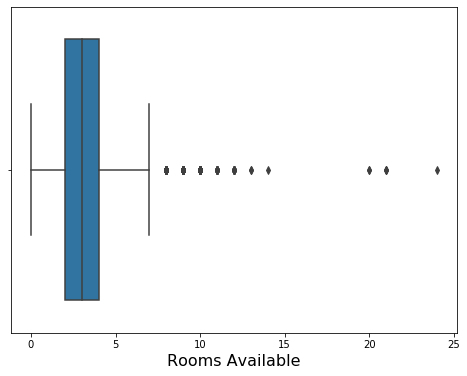

In [107]:
plt.figure(figsize=(8,6))

sns.boxplot(health['rooms_available'], orient='h')
plt.xlabel('Rooms Available', fontsize=16);

 - The boxplot confirms the presence of outliers. 

- We can get rid of the outliers, but this might affect the predictability in cases where over 10 rooms are avaialble. 

### num_visitors Feature 

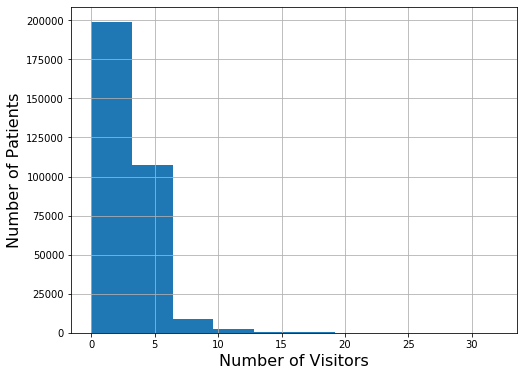

In [101]:
plt.figure(figsize=(8,6))
plt.hist(health['num_visitors'])
plt.xlabel('Number of Visitors', fontsize=16)
plt.ylabel('Number of Patients', fontsize=16)
plt.grid();

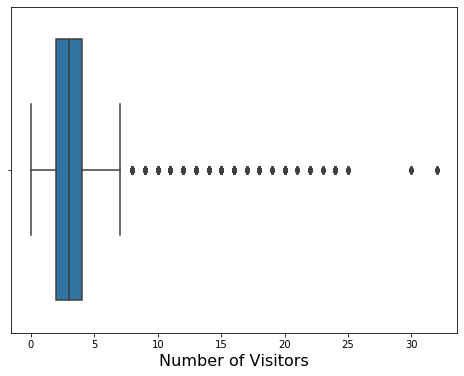

In [106]:
plt.figure(figsize=(8,6))

sns.boxplot(health['num_visitors'], orient='h')
plt.xlabel('Number of Visitors', fontsize=16);

- num_visitors feature also shows a right skewed histogram and the box plot confirms the outliers. 

### Deposit

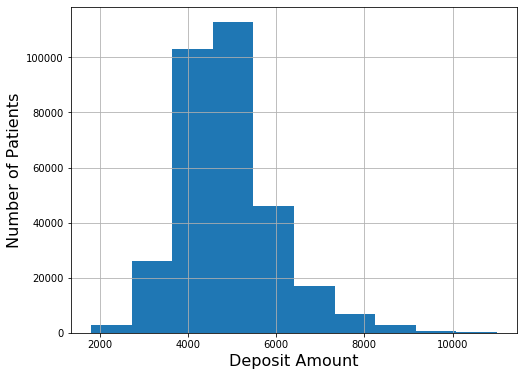

In [103]:
plt.figure(figsize=(8,6))
plt.hist(health['deposit'])
plt.xlabel('Deposit Amount', fontsize=16)
plt.ylabel('Number of Patients', fontsize=16)
plt.grid();

- This variable seems to be distributed symmetrically. 

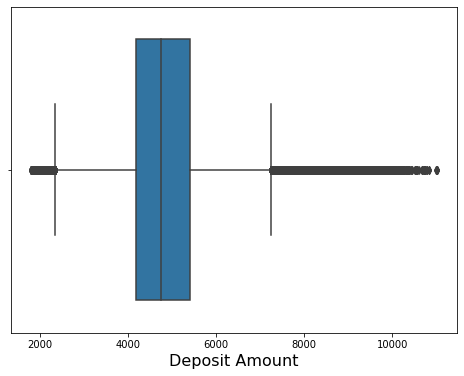

In [105]:
plt.figure(figsize=(8,6))

sns.boxplot(health['deposit'], orient='h')
plt.xlabel('Deposit Amount', fontsize=16);

- The boxplot shows large number of outliers. 